# import libraries

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read file

In [101]:
clm=pd.read_csv("insurance_part2_data.csv")
clm.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# datatype check

In [102]:
clm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# null value check

In [103]:
clm.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

# duplicate check

In [104]:
duplicate=clm.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
clm[duplicate]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


# outlier check

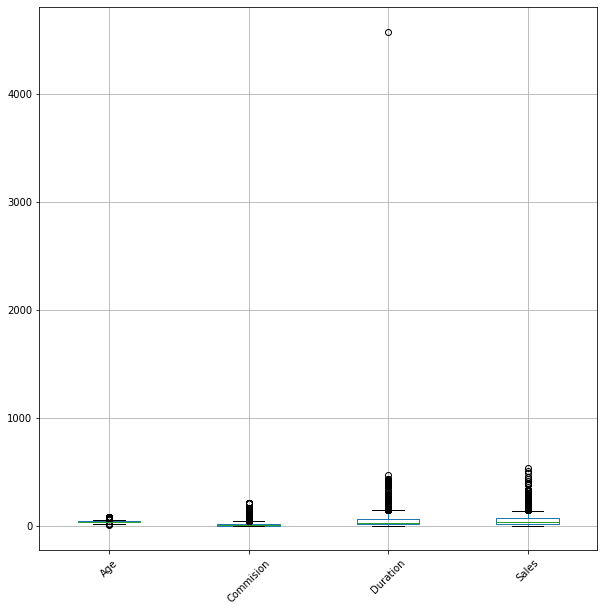

In [105]:
fig,ax=plt.subplots(figsize=(10,10))
clm.boxplot(ax=ax,rot=45)
plt.show()

# descriptive stats

In [106]:
clm.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [107]:
clm.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


# value count for categorical data

In [108]:
for i in clm.columns:
    if clm[i].dtype == 'object': 
        print(i.upper(),': ',clm[i].nunique())
        print(clm[i].value_counts().sort_values())
        print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# pairplot

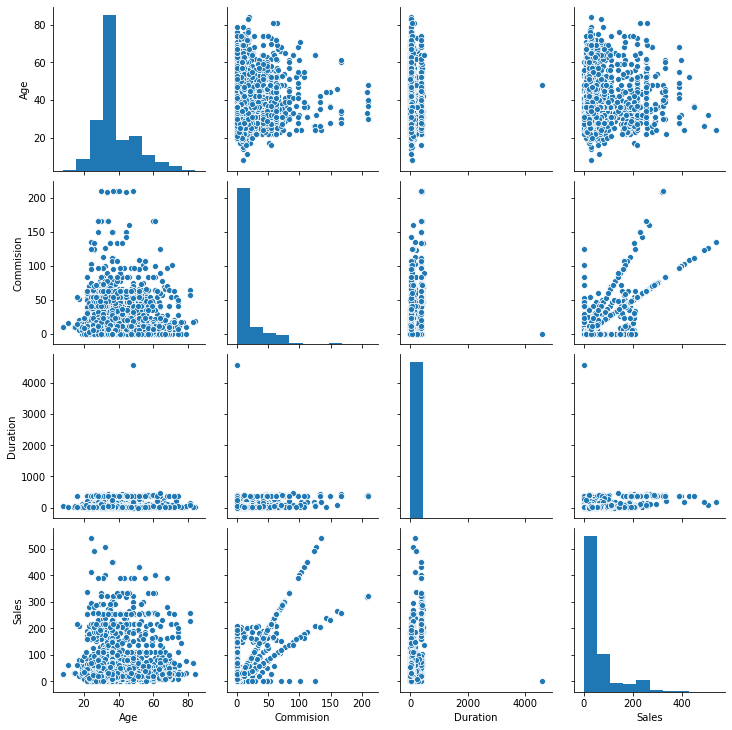

In [109]:
sns.pairplot(clm)

# Target value distribution

In [110]:
clm['Claimed'].value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

# change the data type from categorical to int before modelling

In [111]:
for i in clm.columns:
    if clm[i].dtype == 'object': 
        clm[i] = pd.Categorical(clm[i]).codes

In [112]:
clm.dtypes

Age               int64
Agency_Code        int8
Type               int8
Claimed            int8
Commision       float64
Channel            int8
Duration          int64
Sales           float64
Product Name       int8
Destination        int8
dtype: object

In [113]:
clm.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


# Separate the dependent and indepedent variables

In [114]:
X=clm.drop('Claimed',axis=1)
Y=clm.pop('Claimed')

# split the data in train and test

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

# Decision tree model

In [116]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion = 'gini',random_state=1)

# best parameter with gridsearch

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [118]:
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [119]:
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [50, 120],
    'min_samples_split': [150, 360]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [120]:
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [50, 80],
    'min_samples_split': [150, 240]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [121]:
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [50, 60],
    'min_samples_split': [150, 180]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [122]:
param_grid = {
    'max_depth': [6, 7],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [120, 150]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 120}

In [123]:
param_grid = {
    'max_depth': [5, 6],
    'min_samples_leaf': [30, 40],
    'min_samples_split': [90, 120]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 120}

In [124]:
param_grid = {
    'max_depth': [4, 5],
    'min_samples_leaf': [20, 30],
    'min_samples_split': [60, 90]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 90}

In [125]:
param_grid = {
    'max_depth': [5,7],
    'min_samples_leaf': [20, 30,40,50],
    'min_samples_split': [60, 90,120,150]
}

dt_model = tree.DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search_dt.fit(X_train, Y_train)
grid_search_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 120}

# perdiction with best estimator

In [126]:
best_grid_dt = grid_search_dt.best_estimator_

In [127]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

# confusin matrix for train data

In [128]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_train,ytrain_predict_dt)

array([[1307,  164],
       [ 262,  367]], dtype=int64)

# classification report for train data

In [129]:
print(classification_report(Y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.69      0.58      0.63       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



# confusion matrix for test data

In [130]:
confusion_matrix(Y_test,ytest_predict_dt)

array([[549,  56],
       [155, 140]], dtype=int64)

# classification report for test data

In [131]:
print(classification_report(Y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.71      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



# AUC ROC curve for train data

AUC: 0.837


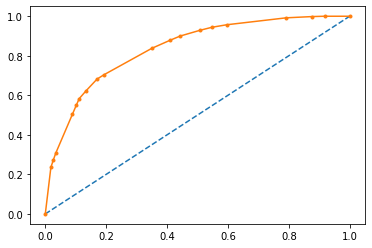

In [161]:
import matplotlib.pyplot as plt
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(Y_train, probs)
auc = roc_auc_score(Y_train, probs)

print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
# show the plot
plt.show()

# AUC ROC for  test data

AUC: 0.800


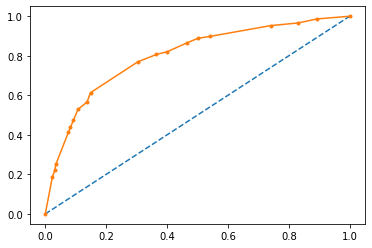

In [162]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(Y_test, probs)
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
# show the plot
plt.show()

# imp features

In [78]:
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.594092
Sales         0.252143
Product Name  0.074957
Duration      0.031694
Age           0.025030
Commision     0.022083
Type          0.000000
Channel       0.000000
Destination   0.000000


# Random Forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()

# best parameter using gridsearch

In [35]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search_rf.fit(X_train, Y_train)
grid_search_rf.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 301}

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search_rf.fit(X_train, Y_train)
grid_search_rf.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 301}

In [37]:
param_grid = {
    'max_depth': [6,7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search_rf.fit(X_train, Y_train)
grid_search_rf.best_params_

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 301}

# Prediction using best estimator

In [38]:
best_grid_rf = grid_search_rf.best_estimator_

In [39]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

# confusion matrix for train data

In [40]:
confusion_matrix(Y_train,ytrain_predict_rf)

array([[1344,  127],
       [ 316,  313]], dtype=int64)

# classification report for train data

In [41]:
print(classification_report(Y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.71      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.72      2100
weighted avg       0.78      0.79      0.78      2100



# confusion matrix for test data

In [42]:
confusion_matrix(Y_test,ytest_predict_rf)

array([[564,  41],
       [177, 118]], dtype=int64)

# classification report for test data

In [43]:
print(classification_report(Y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       605
           1       0.74      0.40      0.52       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.68       900
weighted avg       0.75      0.76      0.73       900



# ROC AUC for train data

AUC: 0.825


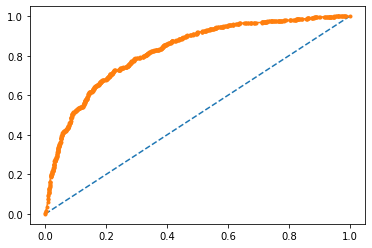

In [163]:
import matplotlib.pyplot as plt
probs = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc=roc_auc_score(Y_train,probs)
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
# show the plot
plt.show()

# ROC AUC for test data

AUC: 0.809


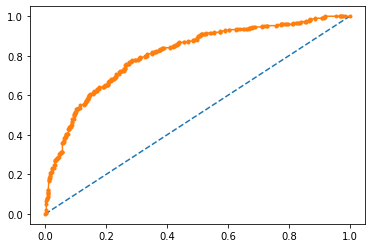

In [164]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc=roc_auc_score(Y_test,probs)
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
# show the plot
plt.show()

In [79]:
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.380986
Product Name  0.250265
Sales         0.136766
Commision     0.113308
Type          0.072618
Duration      0.031680
Age           0.011634
Destination   0.002744
Channel       0.000000


# ANN

# scaling train and test data before applying model

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()

In [50]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,-0.191925,0.728159,0.805203,-0.580954,0.120386,-0.287441,-0.573066,0.246424,-0.439260
1,-0.191925,0.728159,0.805203,-0.580954,0.120386,0.461466,-0.269106,0.246424,1.278517
2,-0.971882,-1.285184,-1.241923,1.216146,0.120386,2.027988,1.746015,1.833819,-0.439260
3,-0.971882,-1.285184,-1.241923,-0.116754,0.120386,-0.294312,-0.179299,1.833819,-0.439260
4,0.978010,-0.278513,0.805203,0.131610,0.120386,-0.129415,-0.172391,1.040121,-0.439260


In [51]:
X_test_scaled = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,-1.556849,-0.278513,0.805203,0.509705,0.120386,-0.301182,0.186835,-1.340970,2.996294
1,1.660472,-1.285184,-1.241923,-0.327232,0.120386,-0.328665,-0.483260,-1.340970,-0.439260
2,-0.874387,-1.285184,-1.241923,-0.427879,0.120386,-0.266829,-0.628332,-1.340970,-0.439260
3,-1.069376,-1.285184,-1.241923,0.026754,0.120386,-0.218734,0.027947,1.833819,-0.439260
4,-0.191925,0.728159,0.805203,-0.580954,0.120386,-0.253087,-0.476352,-0.547273,-0.439260


# import library for ANN

In [52]:
from sklearn.neural_network import MLPClassifier

# grid search for best estimator

In [53]:
param_grid = {
    'hidden_layer_sizes': [10,40,70,100],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['adaptive','constant'],
    'tol': [0.001,0.0001]
}

In [54]:
nncl = MLPClassifier(random_state=1,max_iter=5000)

In [55]:
grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3,n_jobs=-1)

In [56]:
grid_search_ann.fit(X_train_scaled, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=5000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...fle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activati

In [57]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 40,
 'learning_rate': 'adaptive',
 'tol': 0.0001}

# prediction using best estimator

In [58]:
best_model_ann = grid_search_ann.best_estimator_

In [59]:
y_train_predict_ann = best_model_ann.predict(X_train_scaled)
y_test_predict_ann = best_model_ann.predict(X_test_scaled)

# confusion matrix for train data

In [60]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_train,y_train_predict_ann))

[[1326  145]
 [ 264  365]]


# classification report for train data

In [61]:
print(metrics.classification_report(Y_train,y_train_predict_ann))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1471
           1       0.72      0.58      0.64       629

    accuracy                           0.81      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.81      0.80      2100



# confusion matrix for test data

In [62]:
print(metrics.confusion_matrix(Y_test,y_test_predict_ann))

[[554  51]
 [159 136]]


# classification report for test data

In [63]:
print(metrics.classification_report(Y_test,y_test_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



# ROC AUC curve for train data

In [64]:
y_train_predict_prob = best_model_ann.predict_proba(X_train_scaled)
y_test_predict_prob = best_model_ann.predict_proba(X_test_scaled)

AUC: 0.851


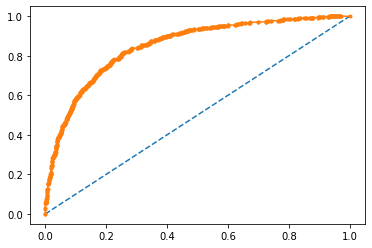

In [165]:
nn_train_auc=roc_auc_score(Y_train,y_train_predict_prob[:, 1])
auc = metrics.roc_auc_score(Y_train,y_train_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, thresholds = metrics.roc_curve(Y_train,y_train_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr, marker='.')
# show the plot
plt.show()

# ROC AUC curve for test data

AUC: 0.813


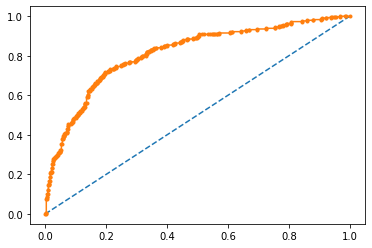

In [166]:
nn_test_auc=roc_auc_score(Y_test,y_test_predict_prob[:, 1])
auc = metrics.roc_auc_score(Y_test,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nn_test_fpr, nn_test_tpr, thresholds = metrics.roc_curve(Y_test,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr, marker='.')
# show the plot
plt.show()

# checking if probability cut-off would improve accuracy and ultimately if we could improve recall

In [160]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_train_predict_prob[:,1])):#defining a loop
        if y_train_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_train,custom_cutoff_train))

0.1 0.560952380952381
0.2 0.7214285714285714
0.3 0.7780952380952381
0.4 0.7942857142857143
0.5 0.8052380952380952
0.6 0.7933333333333333
0.7 0.7704761904761904
0.8 0.7380952380952381
0.9 0.7019047619047619


# accuracy is best at 0.5 so we cannot change it from default 0.5

# creating comparison report of all models

In [132]:
cart_train_acc=best_grid_dt.score(X_train,Y_train) 
cart_train_acc

0.7971428571428572

In [133]:
cart_metrics=classification_report(Y_train, ytrain_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.58
cart_train_f1  0.63


In [135]:
cart_test_acc=best_grid_dt.score(X_test,Y_test)
cart_test_acc

0.7655555555555555

In [136]:
cart_metrics=classification_report(Y_test, ytest_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.47
cart_test_f1  0.57


In [140]:
rf_train_acc=best_grid_rf.score(X_train,Y_train) 
rf_train_acc

0.789047619047619

In [141]:
rf_metrics=classification_report(Y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.5
rf_train_f1  0.59


In [144]:
rf_test_acc=best_grid_rf.score(X_test,Y_test)
rf_test_acc

0.7577777777777778

In [145]:
rf_metrics=classification_report(Y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.4
rf_test_f1  0.52


In [148]:
nn_train_acc=best_model_ann.score(X_train_scaled,Y_train) 
nn_train_acc

0.8052380952380952

In [150]:
nn_metrics=classification_report(Y_train, y_train_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.72
nn_train_recall  0.58
nn_train_f1  0.64


In [152]:
nn_test_acc=best_model_ann.score(X_test_scaled,Y_test)
nn_test_acc

0.7666666666666667

In [153]:
nn_metrics=classification_report(Y_test, y_test_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.73
nn_test_recall  0.46
nn_test_f1  0.56


In [156]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.77,0.79,0.76,0.81,0.77
AUC,0.84,0.80,0.82,0.81,0.85,0.81
Recall,0.58,0.47,0.50,0.40,0.58,0.46
Precision,0.69,0.71,0.71,0.74,0.72,0.73
F1 Score,0.63,0.57,0.59,0.52,0.64,0.56


# ROC curve of all the models together

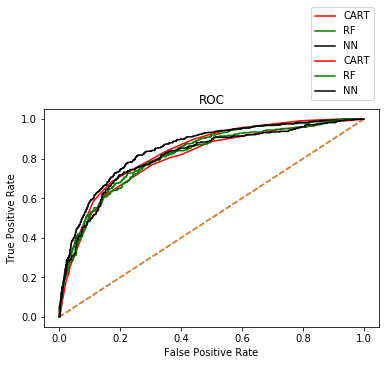

In [167]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')